# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from keras.utils import to_categorical

Using TensorFlow backend.


In [4]:
os.listdir()

['.config',
 'model_weights.h5',
 'Flickr_Data',
 'flickr8k.zip',
 'flickr_data',
 'train_encoded_images.p',
 'sample_data']

In [0]:
file = open('/content/flickr_data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt')
doc = file.read()

In [6]:
doc

'1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .\n1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .\n1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .\n1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .\n1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .\n1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting\n1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .\n1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .\n1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .\n1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .\n1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a painted rainbow with her hands in 

In [0]:
df = pd.read_csv('/content/flickr_data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt', sep="\t", header=None)

In [8]:
df

0                                                  1
0      1000268201_693b08cb0e.jpg#0  A child in a pink dress is climbing up a set o...
1      1000268201_693b08cb0e.jpg#1              A girl going into a wooden building .
2      1000268201_693b08cb0e.jpg#2   A little girl climbing into a wooden playhouse .
3      1000268201_693b08cb0e.jpg#3  A little girl climbing the stairs to her playh...
4      1000268201_693b08cb0e.jpg#4  A little girl in a pink dress going into a woo...
...                            ...                                                ...
40455   997722733_0cb5439472.jpg#0           A man in a pink shirt climbs a rock face
40456   997722733_0cb5439472.jpg#1           A man is rock climbing high in the air .
40457   997722733_0cb5439472.jpg#2  A person in a red shirt climbing up a rock fac...
40458   997722733_0cb5439472.jpg#3                    A rock climber in a red shirt .
40459   997722733_0cb5439472.jpg#4  A rock climber practices on a rock climbing wa...

[40460 rows x 2 columns]

In [9]:
df_dev = pd.read_csv('/content/flickr_data/Flickr_Data/Flickr_TextData/Flickr_8k.devImages.txt', sep="\t", header=None)
df_dev

0
0    2090545563_a4e66ec76b.jpg
1    3393035454_2d2370ffd4.jpg
2    3695064885_a6922f06b2.jpg
3    1679557684_50a206e4a9.jpg
4    3582685410_05315a15b8.jpg
..                         ...
995  3487378989_c051d2715b.jpg
996  2189181027_a445b13438.jpg
997  2631625732_75b714e685.jpg
998  2665586311_9a5f4e3fbe.jpg
999   522652105_a89f1cf260.jpg

[1000 rows x 1 columns]

In [10]:
df_train = pd.read_csv('/content/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt', sep="\t", header=None)
df_train

0
0     2513260012_03d33305cf.jpg
1     2903617548_d3e38d7f88.jpg
2     3338291921_fe7ae0c8f8.jpg
3      488416045_1c6d903fe0.jpg
4     2644326817_8f45080b87.jpg
...                         ...
5995  3488512097_e500cb499f.jpg
5996   964197865_0133acaeb4.jpg
5997    58363930_0544844edd.jpg
5998  3107889179_106d223345.jpg
5999  2671602981_4edde92658.jpg

[6000 rows x 1 columns]

In [11]:
df_test = pd.read_csv('/content/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt', sep="\t", header=None)
df_test

0
0    3385593926_d3e9c21170.jpg
1    2677656448_6b7e7702af.jpg
2     311146855_0b65fdb169.jpg
3    1258913059_07c613f7ff.jpg
4     241347760_d44c8d3a01.jpg
..                         ...
995  3727752439_907795603b.jpg
996  3430607596_7e4f74e3ff.jpg
997  3259666643_ae49524c81.jpg
998  2623930900_b9df917b82.jpg
999  3490736665_38710f4b91.jpg

[1000 rows x 1 columns]

In [12]:
df1 = pd.read_csv('/content/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.lemma.token.txt', sep="\t", header=None)
df1

0                                                  1
0      1305564994_00513f9a5b.jpg#0  A man in street racer armor be examine the tir...
1      1305564994_00513f9a5b.jpg#1         Two racer drive a white bike down a road .
2      1305564994_00513f9a5b.jpg#2  Two motorist be ride along on their vehicle th...
3      1305564994_00513f9a5b.jpg#3  Two person be in a small race car drive by a g...
4      1305564994_00513f9a5b.jpg#4       Two person in race uniform in a street car .
...                            ...                                                ...
40455   989754491_7e53fb4586.jpg#0  A girl in a pool wear goggles and surround by ...
40456   989754491_7e53fb4586.jpg#1  A girl in green goggles in a pool with three o...
40457   989754491_7e53fb4586.jpg#2  A red haired girl make a peace sign be wear ne...
40458   989754491_7e53fb4586.jpg#3  A redheaded girl offer a peace sign as she swi...
40459   989754491_7e53fb4586.jpg#4  A young girl with goggles and floaties pose fo...

[40460 rows x 2 columns]

In [13]:
df

0                                                  1
0      1000268201_693b08cb0e.jpg#0  A child in a pink dress is climbing up a set o...
1      1000268201_693b08cb0e.jpg#1              A girl going into a wooden building .
2      1000268201_693b08cb0e.jpg#2   A little girl climbing into a wooden playhouse .
3      1000268201_693b08cb0e.jpg#3  A little girl climbing the stairs to her playh...
4      1000268201_693b08cb0e.jpg#4  A little girl in a pink dress going into a woo...
...                            ...                                                ...
40455   997722733_0cb5439472.jpg#0           A man in a pink shirt climbs a rock face
40456   997722733_0cb5439472.jpg#1           A man is rock climbing high in the air .
40457   997722733_0cb5439472.jpg#2  A person in a red shirt climbing up a rock fac...
40458   997722733_0cb5439472.jpg#3                    A rock climber in a red shirt .
40459   997722733_0cb5439472.jpg#4  A rock climber practices on a rock climbing wa...

[40460 rows x 2 columns]

In [14]:
df[df[0] == '1305564994_00513f9a5b.jpg#0'][1]

1370    A man in street racer armor is examining the t...
Name: 1, dtype: object

In [15]:
df1.iloc[0]

0                          1305564994_00513f9a5b.jpg#0
1    A man in street racer armor be examine the tir...
Name: 0, dtype: object

In [16]:
df2 = pd.read_csv('/content/Flickr_Data/Flickr_Data/Flickr_TextData/ExpertAnnotations.txt', sep="\t", header=None)
df2

0                            1  2  3  4
0     1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2  1  1  1
1     1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2  1  1  2
2     1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2  1  1  2
3     1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2  1  2  2
4     1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2  1  1  2
...                         ...                          ... .. .. ..
5817   997722733_0cb5439472.jpg  2981702521_2459f2c1c4.jpg#2  1  1  1
5818   997722733_0cb5439472.jpg  2985679744_75a7102aab.jpg#2  1  1  1
5819   997722733_0cb5439472.jpg  3150742439_b8a352e1e0.jpg#2  1  1  2
5820   997722733_0cb5439472.jpg  3375070563_3c290a7991.jpg#2  1  1  1
5821   997722733_0cb5439472.jpg   486917990_72bd4069af.jpg#2  3  3  3

[5822 rows x 5 columns]

In [17]:
df3 = pd.read_csv('/content/Flickr_Data/Flickr_Data/Flickr_TextData/CrowdFlowerAnnotations.txt', sep="\t", header=None)
df3

0                            1         2  3  4
0      1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2  1.000000  3  0
1      1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2  0.000000  0  3
2      1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2  0.000000  0  3
3      1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2  0.000000  0  3
4      1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2  0.000000  0  3
...                          ...                          ...       ... .. ..
47825   997722733_0cb5439472.jpg   543007912_23fc735b99.jpg#2  0.000000  0  3
47826   997722733_0cb5439472.jpg   544576742_283b65fa0d.jpg#2  0.333333  1  2
47827   997722733_0cb5439472.jpg   872622575_ba1d3632cc.jpg#2  1.000000  3  0
47828   997722733_0cb5439472.jpg   888425986_e4b6c12324.jpg#2  0.000000  0  3
47829   997722733_0cb5439472.jpg   997722733_0cb5439472.jpg#2  0.666667  2  1

[47830 rows x 5 columns]

In [0]:
file = open('/content/Flickr_Data/Flickr_Data/Flickr_TextData/readme.txt')
doc = file.read()

In [19]:
doc

'If you use this corpus / data:\n\nPlease cite: M. Hodosh, P. Young and J. Hockenmaier (2013) "Framing Image Description as a Ranking Task: Data, Models and Evaluation Metrics", Journal of Artifical Intellegence Research, Volume 47, pages 853-899\nhttp://www.jair.org/papers/paper3994.html\n\n\nCaptions, Dataset Splits, and Human Annotations :\n\n\nFlickr8k.token.txt - the raw captions of the Flickr8k Dataset . The first column is the ID of the caption which is "image address # caption number"\n\nFlickr8k.lemma.txt - the lemmatized version of the above captions \n\nFlickr_8k.trainImages.txt - The training images used in our experiments\nFlickr_8k.devImages.txt - The development/validation images used in our experiments\nFlickr_8k.testImages.txt - The test images used in our experiments\n\n\nExpertAnnotations.txt is the expert judgments.  The first two columns are the image and caption IDs.  Caption IDs are <image file name>#<0-4>.  The next three columns are the expert judgments for tha

In [20]:
os.listdir()

['.config',
 'model_weights.h5',
 'Flickr_Data',
 'flickr8k.zip',
 'flickr_data',
 'train_encoded_images.p',
 'sample_data']

In [0]:
DATA_DIR = '/content/Flickr_Data/Flickr_Data/Images'
IMG_SIZE = 300
data = []
for img in os.listdir(DATA_DIR):
  try:
    img_array = cv2.imread(os.path.join(DATA_DIR,img))
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    data.append([img, new_array])
  except Exception as E:
    pass

In [22]:
new_array[0]

array([[ 95, 131, 122],
       [126, 156, 150],
       [226, 236, 234],
       [255, 248, 250],
       [245, 240, 241],
       [253, 249, 250],
       [252, 251, 251],
       [220, 239, 238],
       [226, 252, 252],
       [149, 197, 193],
       [ 84, 129, 122],
       [111, 171, 161],
       [101, 202, 186],
       [ 69, 189, 169],
       [ 44, 158, 140],
       [ 71, 162, 147],
       [ 84, 140, 129],
       [ 88, 112, 108],
       [123, 129, 131],
       [118, 117, 113],
       [124, 109,  94],
       [ 68, 148, 125],
       [ 63, 196, 179],
       [ 88, 183, 180],
       [100, 128, 138],
       [ 67, 120, 118],
       [ 68, 154, 137],
       [ 92, 187, 164],
       [123, 191, 171],
       [109, 168, 154],
       [ 93, 156, 141],
       [140, 202, 186],
       [ 98, 160, 144],
       [ 75, 128, 114],
       [ 71, 120, 106],
       [ 67, 104,  92],
       [ 95, 130, 118],
       [119, 149, 138],
       [105, 129, 119],
       [ 84, 107,  98],
       [102, 125, 116],
       [107, 135

In [23]:
np.shape(data)

(8091, 2)

In [24]:
np.shape(os.listdir(DATA_DIR))

(8091,)

In [25]:
data[0][0]

'1445123245_c7b9db0e0c.jpg'

In [26]:
df32 = pd.read_csv('/content/Flickr_Data/Flickr_Data/flickr8ktextfiles/flickr_8k_val_dataset.txt', sep='\t', header=None)
df32

0                                                  1
0                      image_id                                           captions
1     2090545563_a4e66ec76b.jpg  <start> the boy laying face down on a skateboa...
2     2090545563_a4e66ec76b.jpg  <start> Two girls play on a skateboard in a co...
3     2090545563_a4e66ec76b.jpg  <start> Two people play on a long skateboard ....
4     2090545563_a4e66ec76b.jpg  <start> Two small children in red shirts playi...
...                         ...                                                ...
4996   522652105_a89f1cf260.jpg  <start> A girl playing is a pile of colorful b...
4997   522652105_a89f1cf260.jpg  <start> A little girl plays in a ball pit . <end>
4998   522652105_a89f1cf260.jpg  <start> A little girl plays in a pit of colorf...
4999   522652105_a89f1cf260.jpg  <start> A small girl is playing in a ball pit ...
5000   522652105_a89f1cf260.jpg  <start> a young girl with a white shirt and pi...

[5001 rows x 2 columns]

In [27]:
file = open('/content/Flickr_Data/Flickr_Data/flickr8ktextfiles/flickr_8k_val_dataset.txt')
doc = file.read()
doc

'image_id\tcaptions\n2090545563_a4e66ec76b.jpg\t<start> the boy laying face down on a skateboard is being pushed along the ground by another boy . <end>\n2090545563_a4e66ec76b.jpg\t<start> Two girls play on a skateboard in a courtyard . <end>\n2090545563_a4e66ec76b.jpg\t<start> Two people play on a long skateboard . <end>\n2090545563_a4e66ec76b.jpg\t<start> Two small children in red shirts playing on a skateboard . <end>\n2090545563_a4e66ec76b.jpg\t<start> two young children on a skateboard going across a sidewalk <end>\n3393035454_2d2370ffd4.jpg\t<start> a boy in a blue top is jumping off some rocks in the woods . <end>\n3393035454_2d2370ffd4.jpg\t<start> A boy jumps off a tan rock . <end>\n3393035454_2d2370ffd4.jpg\t<start> A boy jumps up in a field in the woods . <end>\n3393035454_2d2370ffd4.jpg\t<start> A young boy jumps off a rock in the forest <end>\n3393035454_2d2370ffd4.jpg\t<start> Child in blue and grey shirt jumping off hill in the woods <end>\n3695064885_a6922f06b2.jpg\t<st

In [0]:
a = '2090545563_a4e66ec76b.jpg#1'

In [29]:
a[:-2]

'2090545563_a4e66ec76b.jpg'

In [0]:
df_img = pd.DataFrame(data=data, columns=['Image Name', 'Data'])

In [31]:
df_img

Image Name                                               Data
0     1445123245_c7b9db0e0c.jpg  [[[50, 53, 61], [38, 42, 47], [41, 46, 49], [3...
1     2276120079_4f235470bc.jpg  [[[9, 13, 8], [2, 8, 3], [121, 119, 114], [91,...
2     2089122314_40d5739aef.jpg  [[[78, 143, 122], [87, 150, 129], [89, 152, 12...
3     3733074526_82aa8d5f8d.jpg  [[[39, 43, 3], [63, 97, 57], [90, 163, 124], [...
4     2729655904_1dd01922fb.jpg  [[[124, 117, 108], [155, 147, 140], [203, 192,...
...                         ...                                                ...
8086  3060594966_030658d318.jpg  [[[47, 60, 67], [47, 60, 68], [45, 60, 68], [4...
8087  3715469645_6d1dc019b3.jpg  [[[25, 52, 98], [30, 60, 100], [16, 64, 97], [...
8088   294098577_c10f32bcfa.jpg  [[[249, 237, 229], [248, 235, 227], [252, 236,...
8089  2424111022_4e332b8aee.jpg  [[[75, 74, 84], [74, 69, 84], [62, 57, 72], [8...
8090  1348304997_afe60a61df.jpg  [[[95, 131, 122], [126, 156, 150], [226, 236, ...

[8091 rows x 2 columns]

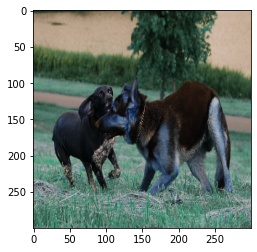

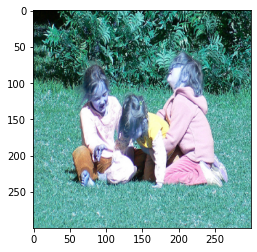

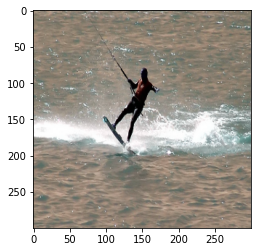

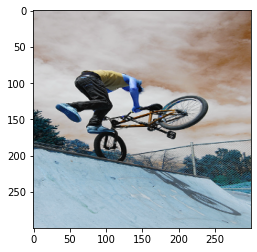

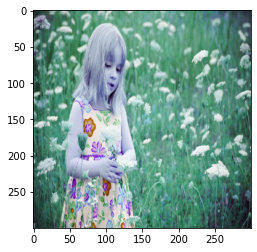

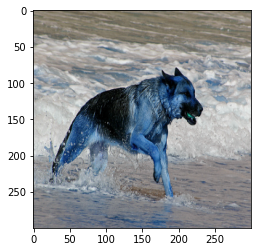

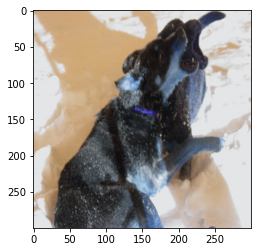

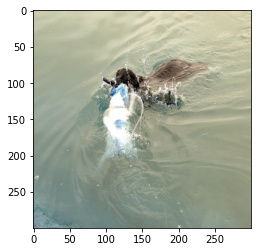

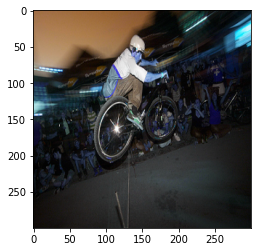

In [32]:
inde = np.random.randint(0, df_img.shape[0], 9)
# print(inde)
for index in inde:
  plt.imshow(df_img.iloc[index][1])
  plt.show()

In [33]:
df_train

0
0     2513260012_03d33305cf.jpg
1     2903617548_d3e38d7f88.jpg
2     3338291921_fe7ae0c8f8.jpg
3      488416045_1c6d903fe0.jpg
4     2644326817_8f45080b87.jpg
...                         ...
5995  3488512097_e500cb499f.jpg
5996   964197865_0133acaeb4.jpg
5997    58363930_0544844edd.jpg
5998  3107889179_106d223345.jpg
5999  2671602981_4edde92658.jpg

[6000 rows x 1 columns]

In [0]:
train_list = df_train[0]

In [0]:
train_list = np.array(train_list)

In [0]:
df_train_data = pd.DataFrame(columns=['Image Name', 'data'])
for img,data2 in data:
  if img in train_list:
    #print(img)
    data1 = {'Image Name': img, 'data': data2}
    df_train_data=df_train_data.append(data1, ignore_index=True)

In [37]:
df_train_data

Image Name                                               data
0     1445123245_c7b9db0e0c.jpg  [[[50, 53, 61], [38, 42, 47], [41, 46, 49], [3...
1     2276120079_4f235470bc.jpg  [[[9, 13, 8], [2, 8, 3], [121, 119, 114], [91,...
2     2089122314_40d5739aef.jpg  [[[78, 143, 122], [87, 150, 129], [89, 152, 12...
3     3733074526_82aa8d5f8d.jpg  [[[39, 43, 3], [63, 97, 57], [90, 163, 124], [...
4     3331102049_bc65cf6198.jpg  [[[18, 49, 42], [19, 50, 43], [19, 51, 43], [1...
...                         ...                                                ...
5995  2102315758_a9148a842f.jpg  [[[190, 186, 167], [200, 195, 176], [203, 197,...
5996  2234910971_80e0325918.jpg  [[[116, 143, 170], [118, 145, 172], [116, 143,...
5997  3605100550_01214a1224.jpg  [[[104, 153, 145], [147, 159, 156], [86, 181, ...
5998  3195969533_98f5de0fab.jpg  [[[131, 137, 150], [62, 68, 81], [151, 156, 16...
5999  3060594966_030658d318.jpg  [[[47, 60, 67], [47, 60, 68], [45, 60, 68], [4...

[6000 rows x 2 columns]

In [38]:
df_train_data.shape

(6000, 2)